WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group 1 mean, Group 2 mean, nu - 2.5, Group 1 log sigma, Group 2 log sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


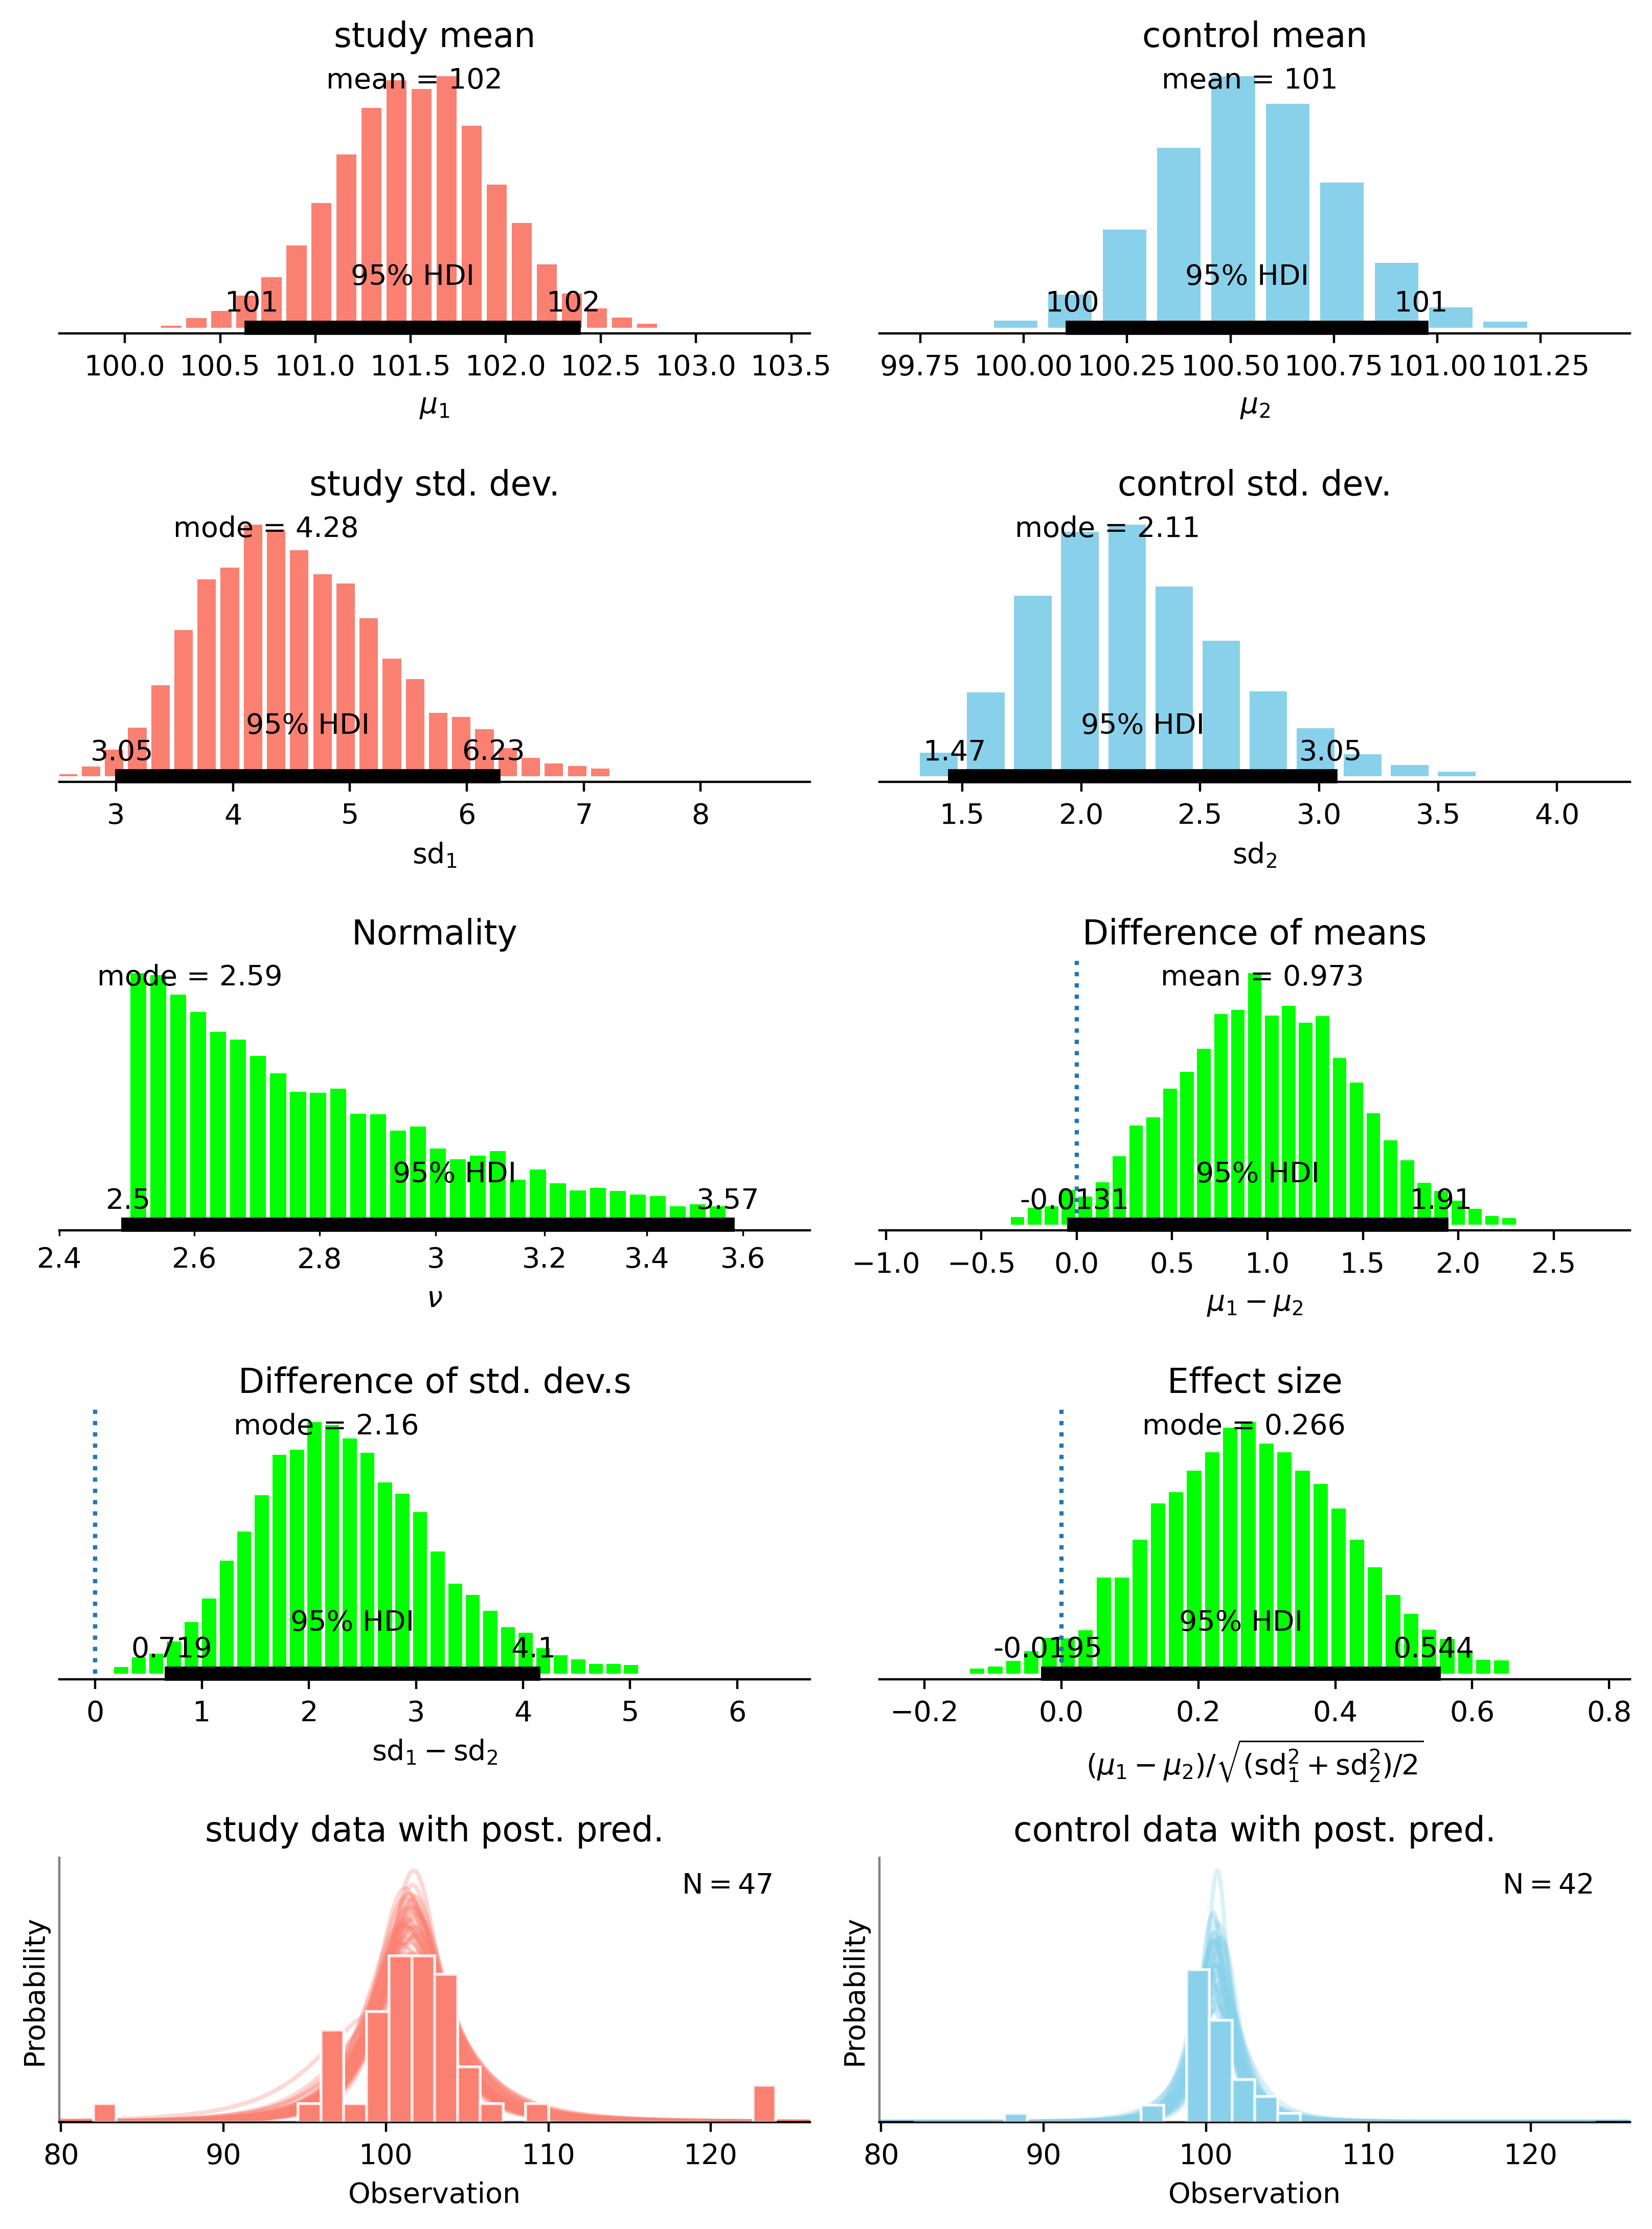

In [1]:
from bayes_test import BayesianHypothesisTest
import pandas as pd

draws = 2000

study = [101, 100, 102, 104, 102, 97, 105, 105, 98, 101, 100, 123, 105, 103,
         100, 95, 102, 106, 109, 102, 82, 102, 100, 102, 102, 101, 102, 102,
         103, 103, 97, 97, 103, 101, 97, 104, 96, 103, 124, 101, 101, 100,
         101, 101, 104, 100, 101]

# IQ scores of those who took a placebo pill
control = [99, 101, 100, 101, 102, 100, 97, 101, 104, 101, 102, 102, 100, 105,
           88, 101, 100, 104, 100, 100, 100, 101, 102, 103, 97, 101, 101, 100,
           101, 99, 101, 100, 100, 101, 100, 99, 101, 100, 102, 99, 100, 99]

df1 = pd.DataFrame({'IQ' : control})
df2 = pd.DataFrame({'IQ' : study})
df1['group'] = 'control'
df2['group'] = 'study'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTest(df=df,
                                   group1_name='study',
                                   group2_name='control',
                                   value_column='IQ',
                                   category_column='group')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
study_test.value_storage

{'Group 1 mean': {'mean': 101.51998203516446,
  'hdi_min': 100.66606280477212,
  'hdi_max': 102.35600121697794},
 'Group 2 mean': {'mean': 100.5469216477721,
  'hdi_min': 100.11836164682016,
  'hdi_max': 100.96114065697648},
 'Group 1 SD': {'mode': 4.284608002731786,
  'hdi_min': 3.0531864815887486,
  'hdi_max': 6.228585019759545},
 'Group 2 SD': {'mode': 2.10925385841362,
  'hdi_min': 1.469035499382253,
  'hdi_max': 3.047543424171193},
 'Normality': {'mode': 2.5928749255298533,
  'hdi_min': 2.500006752650143,
  'hdi_max': 3.5673595726284058},
 'Difference of means': {'mean': 0.9729242749099873,
  'hdi_min': -0.013067472848064199,
  'hdi_max': 1.910689156656133},
 'Difference of SDs': {'mode': 2.163620164695735,
  'hdi_min': 0.7185551358408135,
  'hdi_max': 4.095781814499015},
 'Effect size': {'mode': 0.2664282229267582,
  'hdi_min': -0.019513888648894993,
  'hdi_max': 0.5435446802072228}}

## Skewed Test
Notice how the skew effects the effect size

/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op betainc does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op betainc does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op betainc does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op 

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 263 seconds.


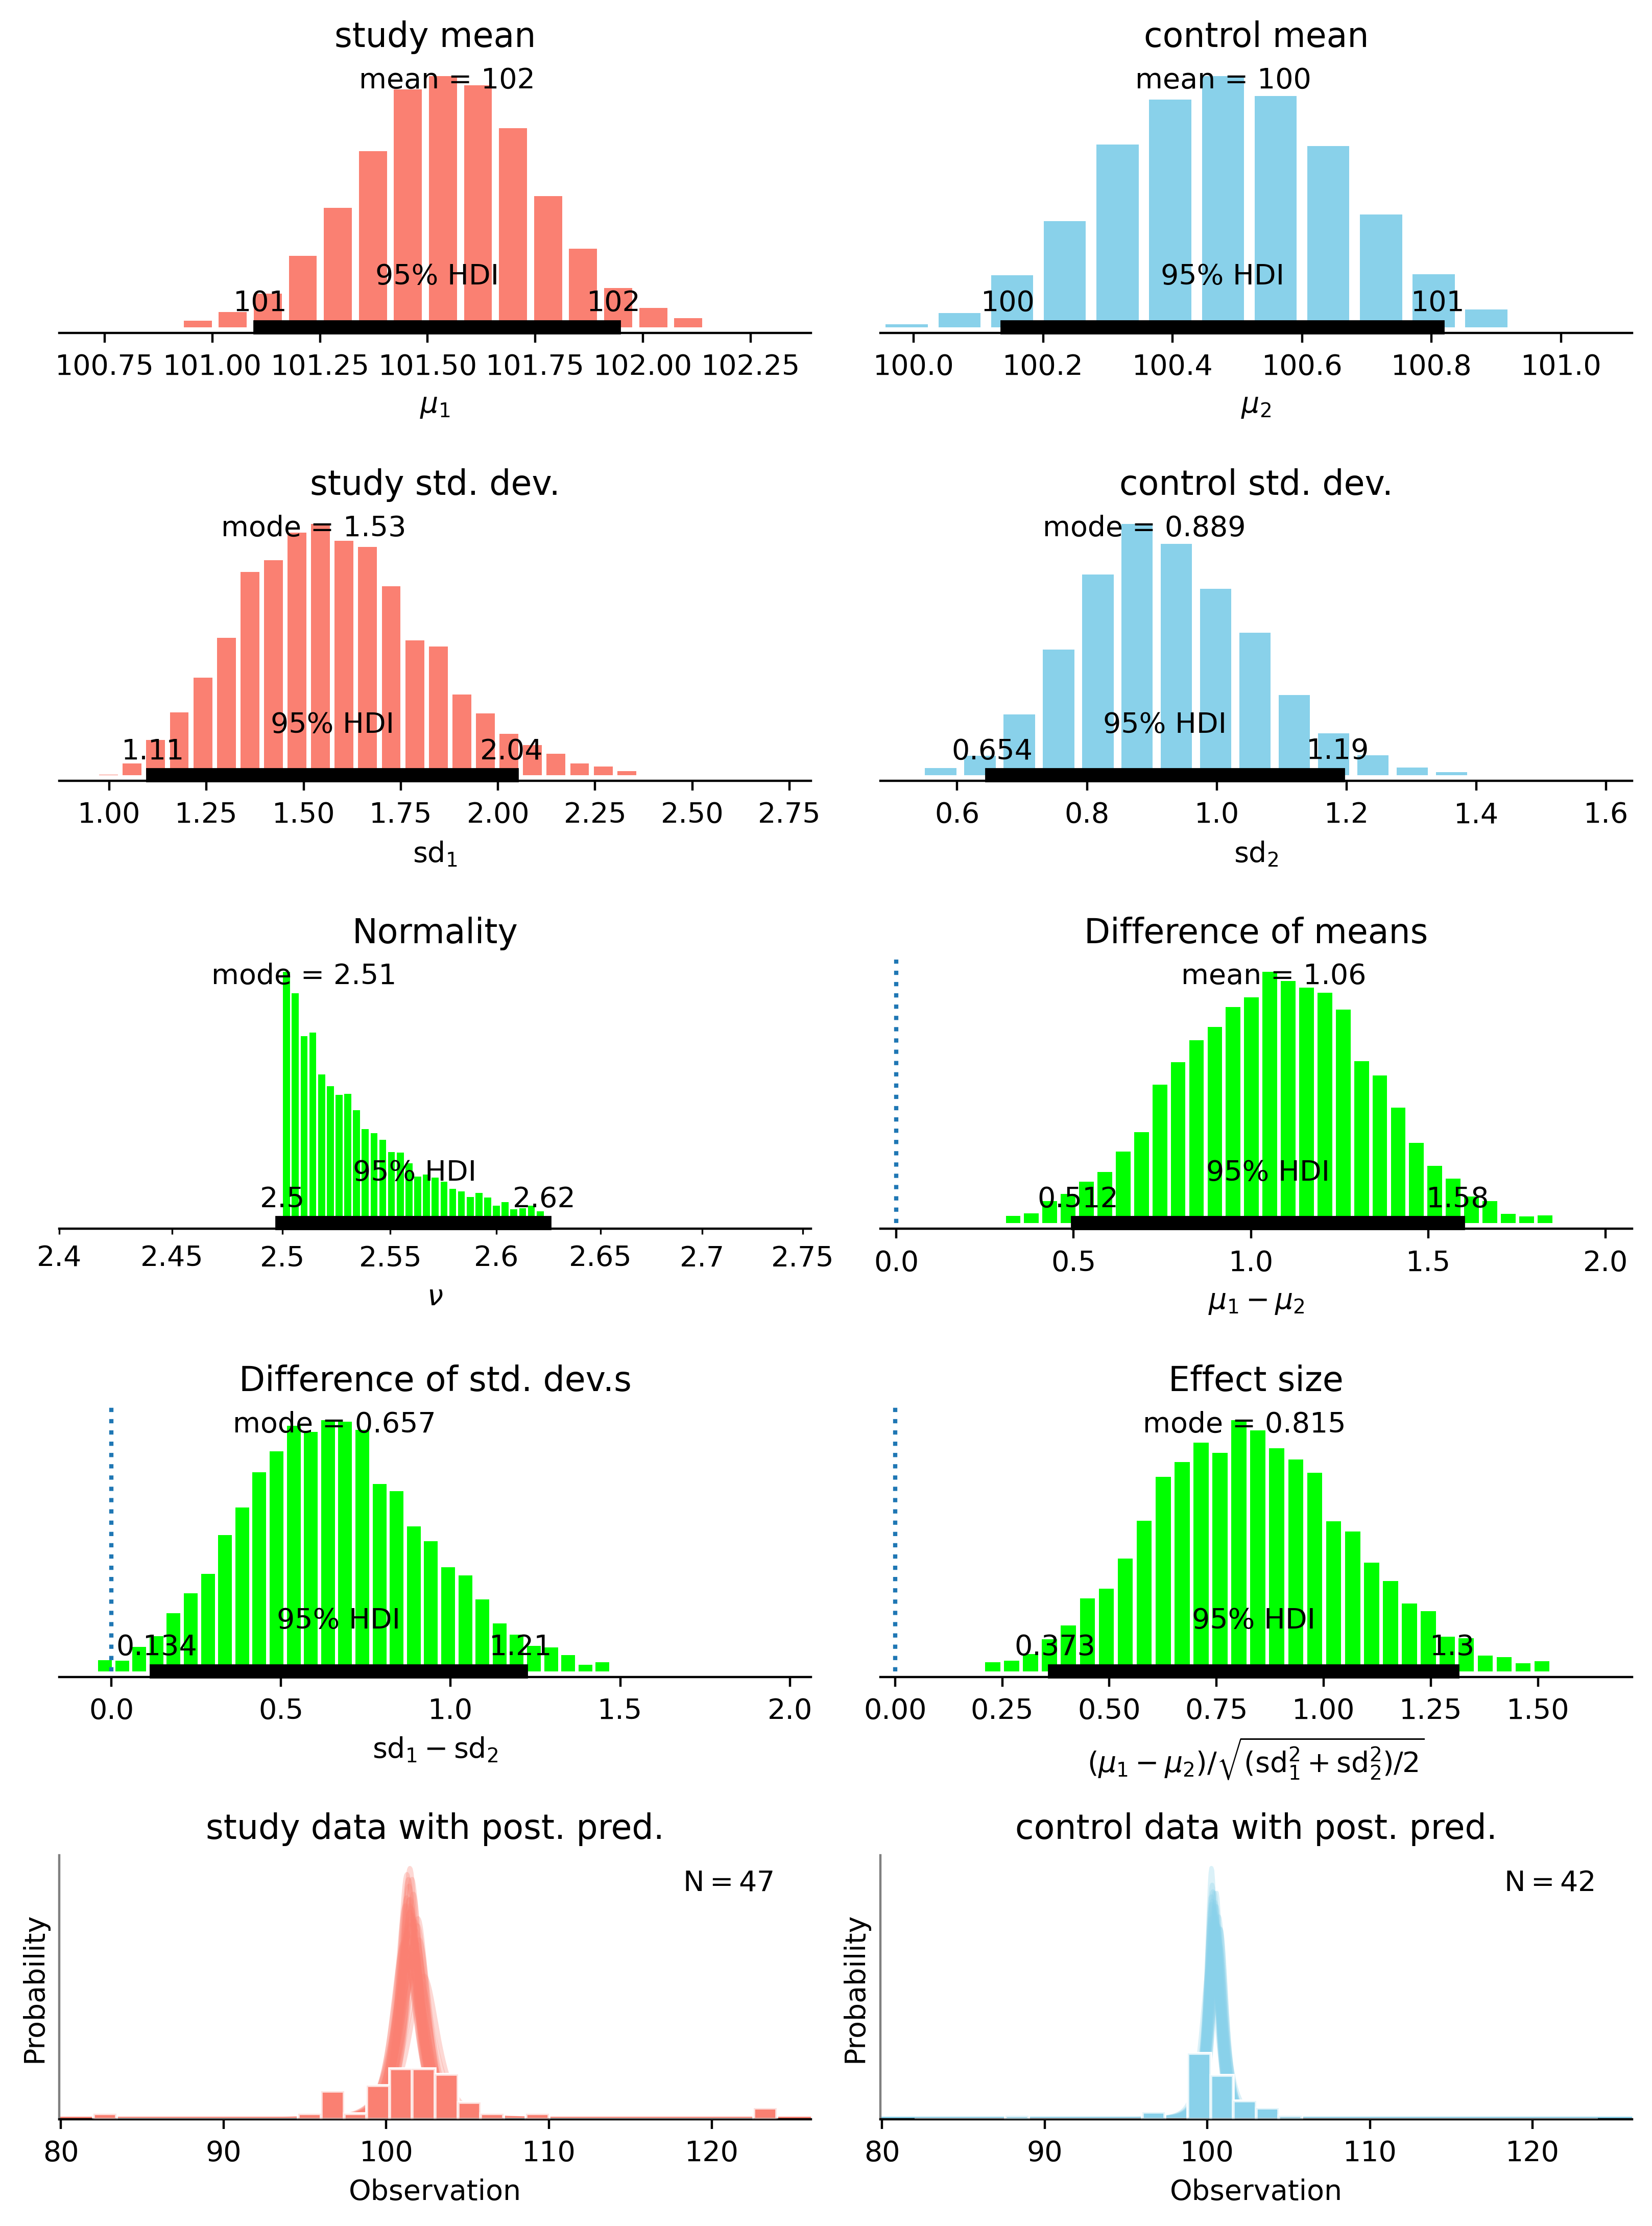

In [3]:
study_test_skew = BayesianHypothesisTest(df=df,
                                   group1_name='study',
                                   group2_name='control',
                                   value_column='IQ',
                                   category_column='group')
study_test.run_skewed_model(draws)
study_test.plot_results()

This takes much longer but can take into the account the skew. For this example it is visible that the control data has peak before 100 and the study data has peaks after 100. The skewed distribution therefore gives us a more accurate representation of the data for Bayesian inference. Unlike the non-skewed model, the effect size does not cross 0.